# Fraud Detection Model

## Business Challenge:

The datasets contains transactions made by credit cards by card holders in Europe. This dataset shows transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.
Due to confidentiality issues, there have not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA; the only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

Feature Class is the response/target variable and it takes value 1 in case of fraud and 0 for genuine transactions.

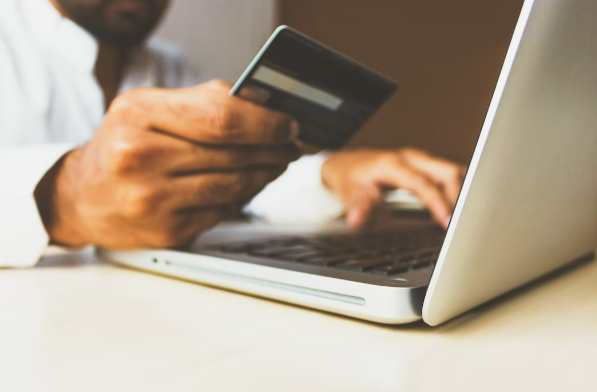

In [2]:
from IPython.display import Image
Image(filename='credit card.png') 

### Import libraries and Load Data

In [3]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('C:/Users/Downloads/creditcard.csv (1)/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Pre-processing

In [13]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

#### There are no null values in the data set.

In [14]:
df.shape[0]

283726

In [15]:
# drop duplicates
nr_rows = df.shape[0]
print('Number of rows: %d' % nr_rows)
df = df.drop_duplicates().reset_index(drop=True)
print('%d duplicates removed' % (nr_rows - df.shape[0]))
print('Number of rows after removal of duplicates: %d' % (df.shape[0]))

Number of rows: 283726
0 duplicates removed
Number of rows after removal of duplicates: 283726



Ratio of the transactions which are not fradulent: 99.83%
Ratio of the transactions which are fradulent: 0.17%


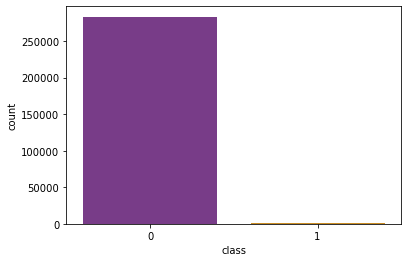

In [16]:
# let's explore the class (target variable)
sns.countplot(df['class'], palette='CMRmap')
no_fradulent = (df['class'].value_counts()[0] / len(df['class'])) * 100
fradulent = (df['class'].value_counts()[1] / len(df['class'])) * 100
print('\nRatio of the transactions which are not fradulent: %.2f%%' % no_fradulent)
print('Ratio of the transactions which are fradulent: %.2f%%' % fradulent)

#### The genuine transactions are over 99% and we have very less cases of fraud transactions. We might want to use oversampling technique to increase the minority class (fraud transactions in this case.)


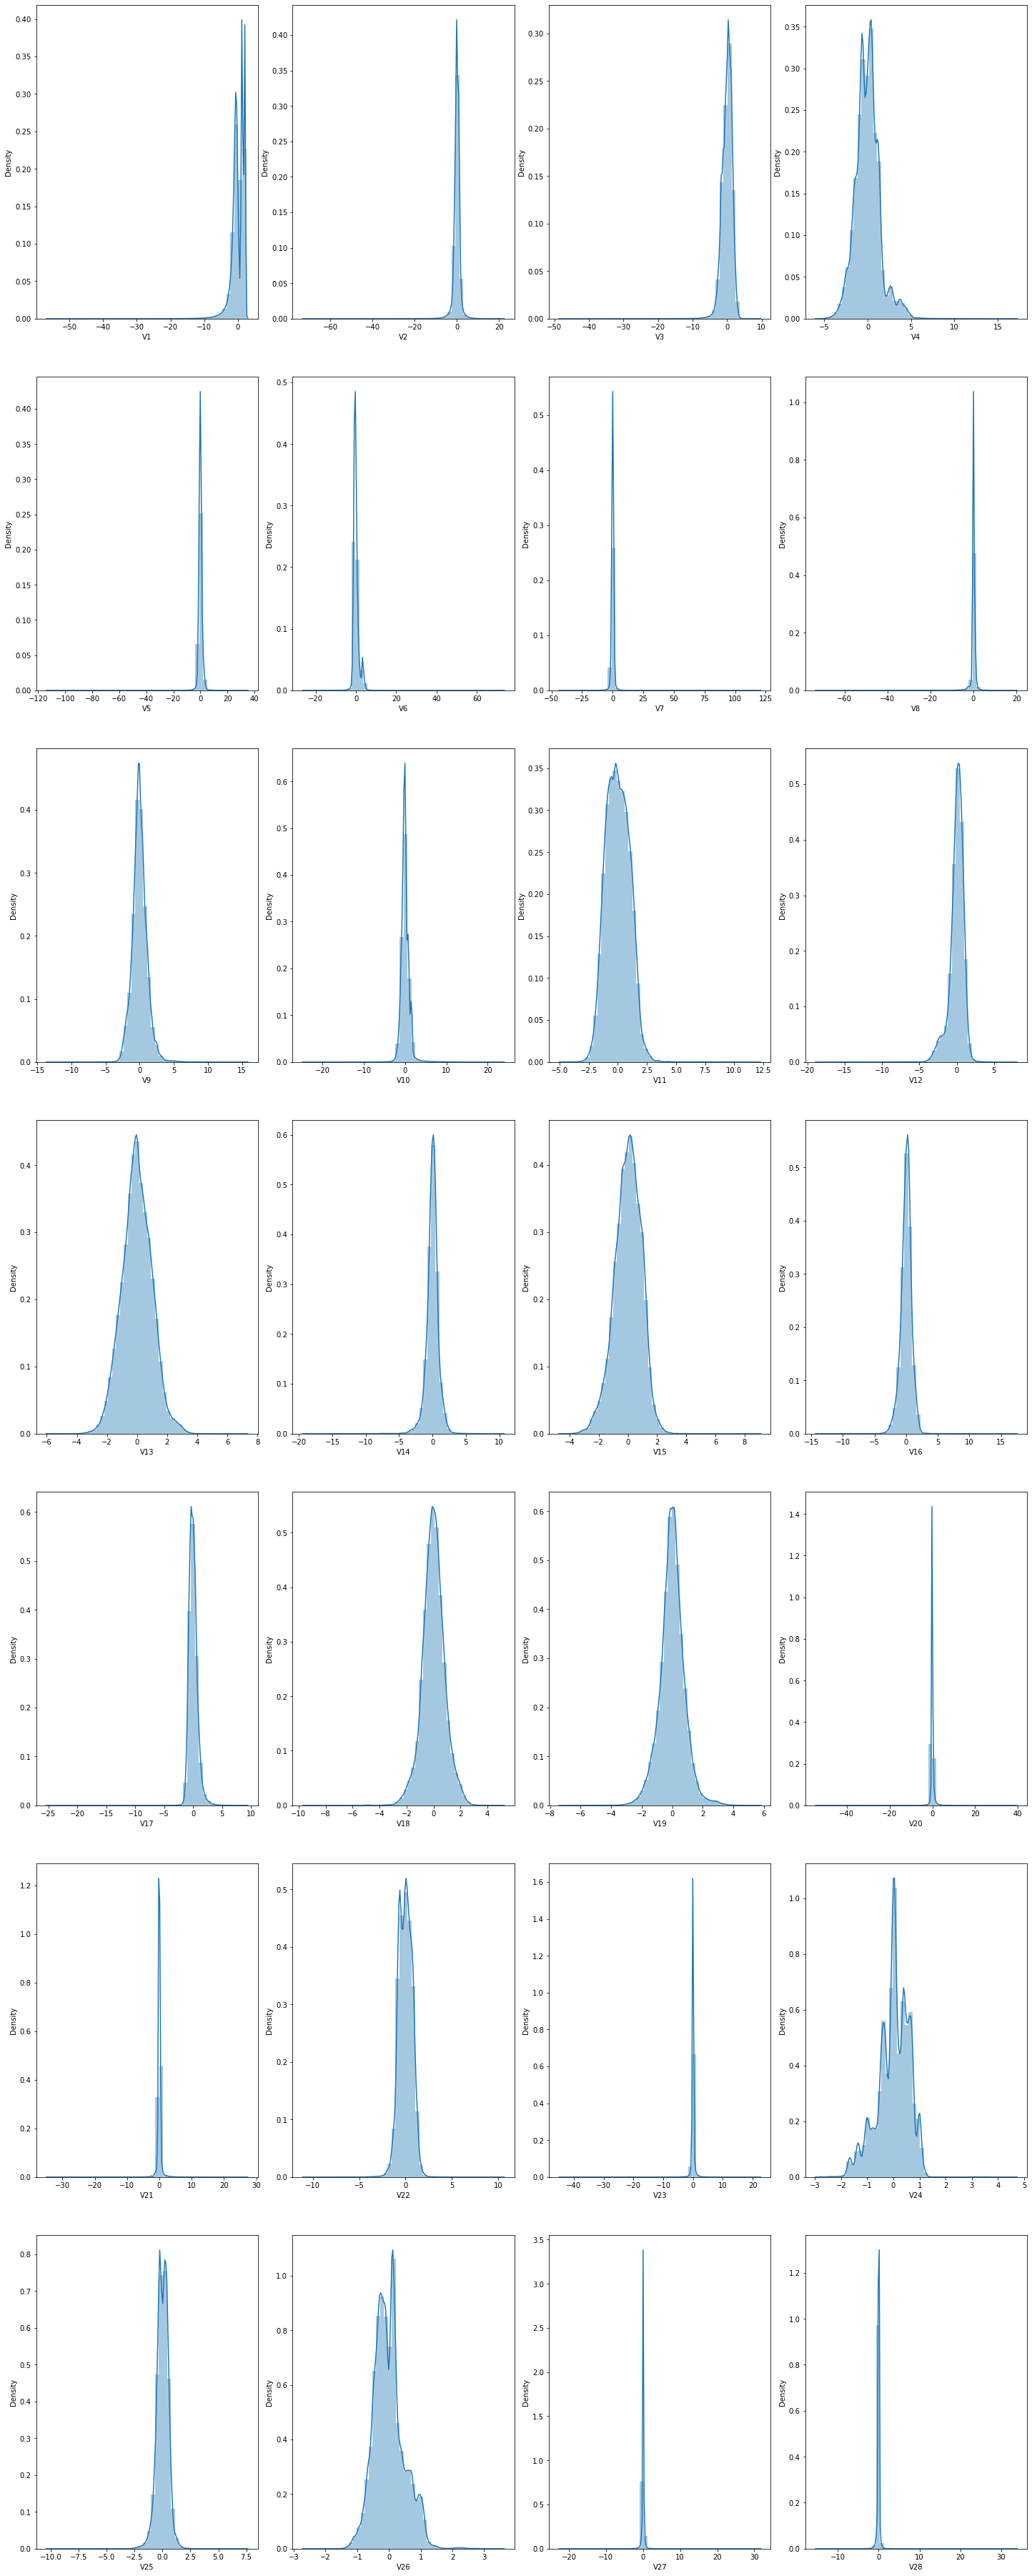

In [17]:
df_temp = df.drop(columns = ['Time', 'Amount', 'class'], axis = 1)

# create distribution plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20,50))
index = 0 
ax = ax.flatten()

for col in df_temp.columns:
  sns.distplot(df_temp[col], ax=ax[index])
  index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

#### we can see that most of the vairables seem to be show a uniform distributions.

In [18]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.09,-0.04,-0.01,0.03,-0.25,0.13,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.23,-0.09
V2,-0.01,0.01,1.00,0.01,-0.00,0.01,-0.00,0.01,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.53,0.08
V3,-0.42,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.21,-0.18
V4,-0.11,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.10,0.13
V5,0.17,-0.01,0.01,-0.01,0.00,1.00,-0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.39,-0.09
V6,-0.06,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.22,-0.04
V7,0.09,-0.01,0.01,-0.01,0.00,-0.01,0.00,1.00,-0.01,-0.00,-0.01,0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.40,-0.17
V8,-0.04,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.01,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.02,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.10,0.03
V9,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.01,-0.04,-0.09


#### As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

In [21]:
X = df.drop(columns = ['class'], axis = 1)
y = df['class']

#### Let’s apply scaling techniques on the features

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

#x_scaler[-1]

In [23]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.25, random_state = 42, stratify = y)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [25]:
def result (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metrics(y_test, y_pred.round())
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

Evaluation of KNN Classifier

Accuracy: 0.99939
Precision: 0.94118
Recall: 0.67797
F1-score: 0.78818


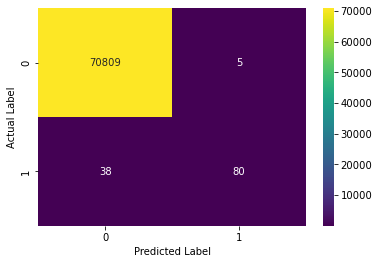

In [28]:
print('Evaluation of KNN Classifier')
result(KNeighborsClassifier, x_train, y_train, x_test, y_test)

Evaluation of DecisionTreeClassifier

Accuracy: 0.99910
Precision: 0.73684
Recall: 0.71186
F1-score: 0.72414


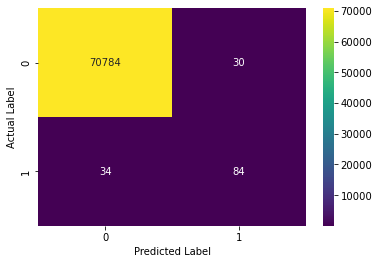

In [27]:
print('Evaluation of DecisionTreeClassifier')
result(DecisionTreeClassifier, x_train, y_train, x_test, y_test)

#### Oversampling Technique 

Before OverSampling, counts of label '1': 355
Before OverSampling, counts of label '0': 212439 

After OverSampling, the shape of train_x: (424878, 30)
After OverSampling, the shape of train_y: (424878,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<AxesSubplot:xlabel='class', ylabel='count'>

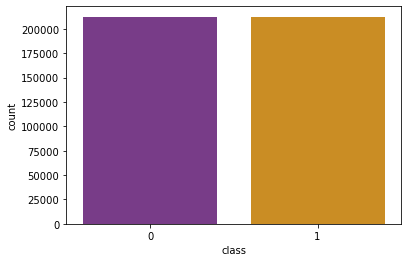

In [29]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='CMRmap')

In [30]:
def result (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metrics(y_test, y_pred.round())

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    y_pred_prob = x.predict_proba(x_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

Evaluation of DecisionTreeClassifier After SMOTE

Accuracy: 0.99730
Precision: 0.36032
Recall: 0.72358
F1-score: 0.48108


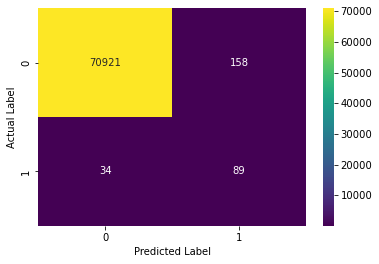

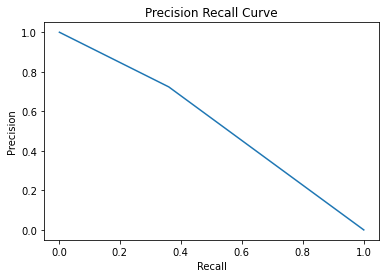

In [20]:
print('Evaluation of DecisionTreeClassifier After SMOTE')
result(DecisionTreeClassifier, x_train_s, y_train_s, x_test, y_test)

Evaluation of KNN Classifier After SMOTE

Accuracy: 0.99796
Precision: 0.43779
Recall: 0.80508
F1-score: 0.56716


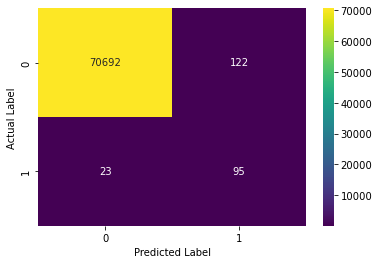

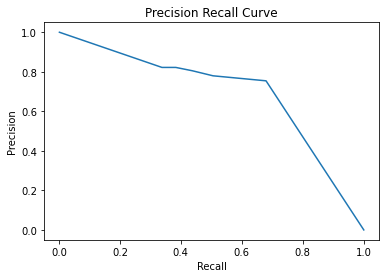

In [31]:
from sklearn.neighbors import KNeighborsClassifier
print('Evaluation of KNN Classifier After SMOTE')
result(KNeighborsClassifier, x_train_s, y_train_s, x_test, y_test)

In [33]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

[0.0007330964867760672,
 0.0005639203744431286,
 0.00046523430891558113,
 0.0005780183838042069,
 0.0006062144025263633,
 0.0006203124118874415,
 0.0006203124118874415,
 0.0006062144025263633,
 0.0006344104212485198,
 0.0006344104212485198,
 0.0006203124118874415,
 0.0006485084306095979,
 0.0006344104212485198,
 0.0006344104212485198,
 0.0006203124118874415,
 0.0005921163931652851,
 0.0005921163931652851,
 0.0006203124118874415,
 0.0006062144025263633,
 0.0006062144025263633,
 0.0006062144025263633,
 0.0006062144025263633,
 0.0006203124118874415,
 0.0006203124118874415,
 0.0006344104212485198,
 0.0006344104212485198,
 0.0006485084306095979,
 0.0006485084306095979,
 0.0006485084306095979,
 0.0006626064399706761]

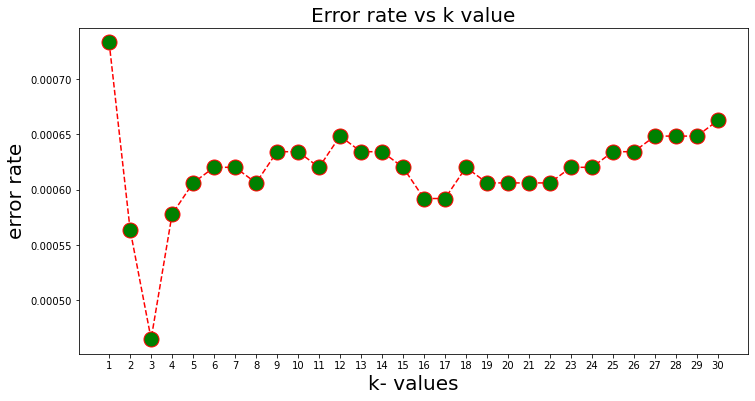

In [34]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

#### As we see in above figure after k=21 the fluctuation in error rate is not much . Hence whenever we will see the threshold value after which k-value is not fluctuating more we will select that specific threshold value as k value.

#### We have chosen k=21 for modeling our dataset.

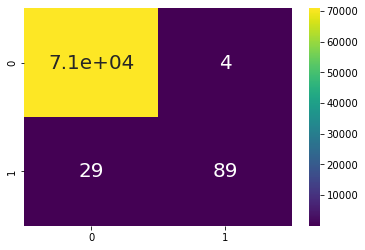

In [40]:
clf=KNeighborsClassifier(n_neighbors=21)
clf.fit(x_train,y_train)
predicted_value=clf.predict(x_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

In [41]:
print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.96      0.75      0.84       118

    accuracy                           1.00     70932
   macro avg       0.98      0.88      0.92     70932
weighted avg       1.00      1.00      1.00     70932



## Conclusion:
### Implementing SMOTE Technique on our imbalanced dataset helped us to balance the data. SMOTE was configured to multiply the amount of fraud samples.

### It does seem that SMOTE slightly outperforms a simple configuration of the classifiers's parameter when it comes to detecting fraud.

### After comparison between Decision Tree and KNN classifier, we found that KNN Classifier gave us the best result. Recall score of 80 shows that KNN algorithms can be highly effective at calibrating the rate of false negatives vs false positives, thereby optimizing a cost function. It's worth reducing the false negative rate then looking at the accuracy of the model.